In [1]:
import numpy as np
from matplotlib_rc import *
from toolbox import pickle_load


In [2]:
eos_array,MRBIT,RMF_para_success,form_factor_lit,BE_radius,energy_Ca_list,energy_Pb_list,bulk_properties=pickle_load('./data/','special_sets',['eos_array','MRBIT','RMF_para_success','form_factor_lit','BE_radius','energy_Ca_list','energy_Pb_list','bulk_properties'])
name_list=['NL3','FSU2','IOPB-I','IUFSU','BigApple','HPUC','BSRV','DINOa','DINOb','DINOc','CPREX1','CPREX2']
eos_array_tot=np.copy(eos_array)
eos_array_tot[:,1:,0]=0
eos_array_tot=eos_array_tot.sum(axis=1)

In [3]:
print('\\begin{tabular}{llc'+'c'*(len(name_list))+'}')
print('\hline\hline')
print(('&&Experiment'+'& %s'*len(form_factor_lit))%tuple(name_list)+'\\\\')
decimals=4
decimals_3=3
decimals_2=2
decimals_1=1
fmt=' & %.4f'
fmt_0=' & %d'
fmt_1=' & %.1f'
fmt_2=' & %.2f'
fmt_3=' & %.3f'
exp=np.array([['7.87','8.67'],['5.50','3.48'],['0.409','0.158'],['0.159$\pm$ 0.017','0.137$\pm$0.015'],['0.041$\pm$0.013','0.0277$\pm$0.0055']]).transpose()
for i,exp_i,nuclei_i,BE_i,BE_basis_i in zip(range(2),exp,['{\\bf$^{208}$Pb~~}','{\\bf$^{48}$Ca~~}'],[energy_Pb_list[:,-1]*939,energy_Ca_list[:,-1]*939],BE_radius[:,[0,2],2].transpose()):
    print('\hline')
    print(('&$B/A$ [MeV]&~'+exp_i[0]+fmt_2*len(form_factor_lit)+'\\\\')%tuple(np.round(-BE_i,decimals=decimals_2)))
    print(('&$R_{ch}$ [fm]&~'+exp_i[1]+fmt_2*len(form_factor_lit)+'\\\\')%tuple(np.round(form_factor_lit[:,i,3],decimals=decimals_2)))
    print((nuclei_i+'&$\Delta R_{np}$ [fm]&~'+exp_i[3]+fmt*len(form_factor_lit)+'\\\\')%tuple(np.round(form_factor_lit[:,i,6]-form_factor_lit[:,i,5],decimals=decimals)))
    print(('&$F_{ch}$ []&~'+exp_i[2]+fmt*len(form_factor_lit)+'\\\\')%tuple(np.round(form_factor_lit[:,i,8],decimals=decimals)))
    print(('&$\Delta F$ []&~'+exp_i[4]+fmt*len(form_factor_lit)+'\\\\')%tuple(np.round(form_factor_lit[:,i,8]-form_factor_lit[:,i,9],decimals=decimals)))
print('\hline\hline')
print('\\end{tabular}')
  

\begin{tabular}{llccccccccccccc}
\hline\hline
&&Experiment& NL3& FSU2& IOPB-I& IUFSU& BigApple& HPUC& BSRV& DINOa& DINOb& DINOc& CPREX1& CPREX2\\
\hline
&$B/A$ [MeV]&~7.87 & 7.88 & 7.87 & 7.86 & 7.88 & 7.85 & 7.85 & 7.84 & 7.87 & 7.87 & 7.87 & 7.84 & 7.86\\
&$R_{ch}$ [fm]&~5.50 & 5.51 & 5.49 & 5.52 & 5.49 & 5.50 & 5.56 & 5.53 & 5.51 & 5.51 & 5.51 & 5.49 & 5.49\\
{\bf$^{208}$Pb~~}&$\Delta R_{np}$ [fm]&~0.159$\pm$ 0.017 & 0.2797 & 0.2862 & 0.2195 & 0.1618 & 0.1508 & 0.1196 & 0.2595 & 0.1746 & 0.1993 & 0.2235 & 0.1905 & 0.1525\\
&$F_{ch}$ []&~0.409 & 0.4067 & 0.4094 & 0.4052 & 0.4106 & 0.4080 & 0.3992 & 0.4043 & 0.4074 & 0.4075 & 0.4073 & 0.4100 & 0.4092\\
&$\Delta F$ []&~0.041$\pm$0.013 & 0.0414 & 0.0423 & 0.0319 & 0.0233 & 0.0214 & 0.0168 & 0.0378 & 0.0262 & 0.0303 & 0.0342 & 0.0282 & 0.0222\\
\hline
&$B/A$ [MeV]&~8.67 & 8.65 & 8.62 & 8.64 & 8.53 & 8.52 & 8.65 & 8.66 & 8.67 & 8.67 & 8.67 & 8.64 & 8.66\\
&$R_{ch}$ [fm]&~3.48 & 3.45 & 3.43 & 3.45 & 3.44 & 3.46 & 3.46 & 3.44 & 3.47 & 3.47 

In [4]:
print('\\begin{tabular}{ll'+'c'*(len(name_list))+'}')
print('\hline\hline')
print(('&'+'& %s'*len(form_factor_lit))%tuple(name_list)+'\\\\')
print('\hline')
print(('&n$_s$ [fm$^{-3}$]'+fmt*len(name_list)+'\\\\')%tuple(np.round(bulk_properties[:,0,0],decimals=decimals)))
print(('&M$^*$ [MeV]'+fmt_1*len(form_factor_lit)+'\\\\')%tuple(np.round(bulk_properties[:,1,0],decimals=decimals_1)))
print(('&B [MeV]'+fmt_2*len(name_list)+'\\\\')%tuple(np.round(939-bulk_properties[:,2,0],decimals=decimals_2)))
print(('SNM'+'&K [MeV]'+fmt_1*len(form_factor_lit)+'\\\\')%tuple(np.round(bulk_properties[:,4,0],decimals=decimals_1)))
print(('&S$_v$ [MeV]'+fmt_1*len(name_list)+'\\\\')%tuple(np.round(bulk_properties[:,2,2],decimals=decimals_1)))
print(('&L [MeV]'+fmt_1*len(name_list)+'\\\\')%tuple(np.round(bulk_properties[:,3,2],decimals=decimals_2)))
print(('&K$_{sym}$ [MeV]'+fmt_1*len(form_factor_lit)+'\\\\')%tuple(np.round(bulk_properties[:,4,2],decimals=decimals_1)))

print('\hline')
print(('&M$^*_n$ [MeV]'+fmt_1*len(form_factor_lit)+'\\\\')%tuple(np.round(bulk_properties[:,1,2],decimals=decimals_1)))
print(('&M$^*_p$ [MeV]'+fmt_1*len(form_factor_lit)+'\\\\')%tuple(np.round(bulk_properties[:,1,1],decimals=decimals_1)))
print(('PNM'+'&S$_v$ [MeV]'+fmt_1*len(name_list)+'\\\\')%tuple(np.round(bulk_properties[:,2,1],decimals=decimals_1)))
print(('&L [MeV]'+fmt_1*len(name_list)+'\\\\')%tuple(np.round(bulk_properties[:,3,1],decimals=decimals_2)))
print(('&K$_{sym}$ [MeV]'+fmt_1*len(form_factor_lit)+'\\\\')%tuple(np.round(bulk_properties[:,4,1],decimals=decimals_1)))

print('\hline\hline')
print('\\end{tabular}')

\begin{tabular}{llcccccccccccc}
\hline\hline
&& NL3& FSU2& IOPB-I& IUFSU& BigApple& HPUC& BSRV& DINOa& DINOb& DINOc& CPREX1& CPREX2\\
\hline
&n$_s$ [fm$^{-3}$] & 0.1483 & 0.1504 & 0.1495 & 0.1546 & 0.1546 & 0.1490 & 0.1480 & 0.1522 & 0.1525 & 0.1519 & 0.1516 & 0.1518\\
&M$^*$ [MeV] & 558.7 & 557.0 & 557.2 & 572.1 & 572.8 & 572.9 & 565.3 & 587.4 & 593.0 & 593.9 & 692.8 & 648.1\\
&B [MeV] & 16.24 & 16.26 & 16.10 & 16.40 & 16.34 & 15.98 & 16.10 & 16.16 & 16.21 & 16.21 & 16.29 & 16.14\\
SNM&K [MeV] & 271.6 & 237.7 & 222.6 & 231.3 & 227.0 & 220.2 & 227.2 & 210.0 & 207.0 & 206.0 & 223.8 & 223.5\\
&S$_v$ [MeV] & 37.3 & 37.6 & 33.3 & 31.3 & 31.3 & 28.4 & 36.1 & 31.4 & 33.1 & 34.6 & 32.9 & 29.8\\
&L [MeV] & 118.2 & 112.7 & 63.6 & 47.2 & 39.8 & 41.6 & 84.6 & 50.0 & 70.0 & 90.0 & -3.5 & 0.4\\
&K$_{sym}$ [MeV] & 101.0 & 25.4 & -37.0 & 28.5 & 87.5 & 81.1 & -73.2 & 506.0 & 609.1 & 714.8 & -418.4 & -239.8\\
\hline
&M$^*_n$ [MeV] & 569.2 & 566.0 & 566.7 & 580.5 & 582.8 & 581.4 & 573.3 & 352.1 & 333.0 

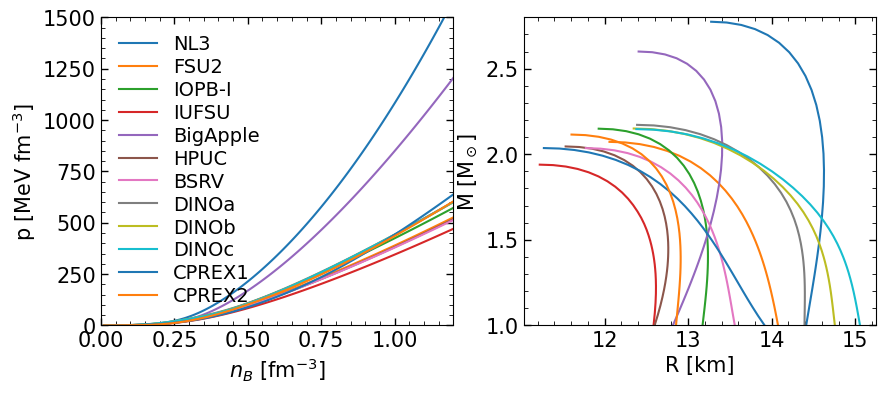

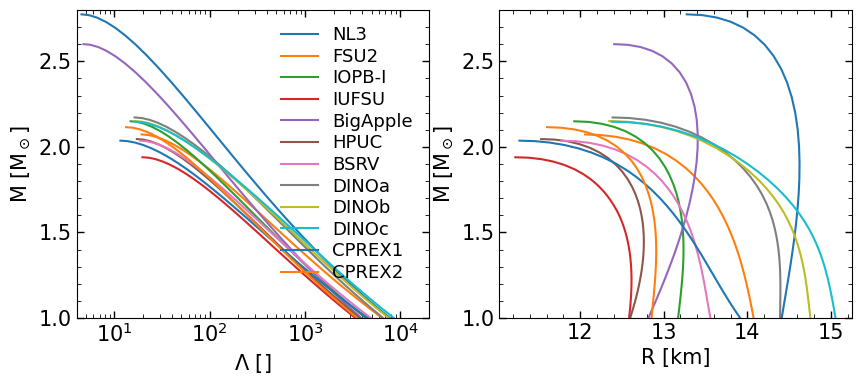

In [5]:
fig,axes=plt.subplots(1,2,figsize=(10,4),sharex=False,sharey=False)
[axes[0].plot(eos_array_i[0],eos_array_i[2],label=name) for eos_array_i,name in zip(eos_array_tot,name_list)]
axes[0].legend(frameon=False,fontsize=14,labelspacing=0.2)
axes[0].set_xlabel('$n_B$ [fm$^{-3}$]',fontsize=15)
axes[0].set_ylabel('p [MeV fm$^{-3}$]',fontsize=15)
axes[0].set_xlim(0,1.2)
axes[0].set_ylim(0,1500)
[axes[1].plot(MRBIT_i[1]/1e3,MRBIT_i[0],label=name) for MRBIT_i,name in zip(MRBIT,name_list)]
#axes[1].legend(frameon=False,fontsize=15)
axes[1].set_xlabel('R [km]',fontsize=15)
axes[1].set_ylabel('M [M$_\odot$]',fontsize=15)
axes[1].set_ylim(1,2.8)
plt.savefig('./figures/special_sets_RMF_eos_mr.pdf',bbox_inches = 'tight',format='pdf')

fig,axes=plt.subplots(1,2,figsize=(10,4),sharex=False,sharey=False)
[axes[0].plot(MRBIT_i[6],MRBIT_i[0],label=name) for MRBIT_i,name in zip(MRBIT,name_list)]
axes[0].legend(frameon=False,fontsize=13,labelspacing=0.2)
axes[0].set_xscale('log')
axes[0].set_xlabel('$\Lambda$ []',fontsize=15)
axes[0].set_ylabel('M [M$_\odot$]',fontsize=15)
axes[0].set_xlim(4,2e4)
axes[0].set_ylim(1,2.8)
[axes[1].plot(MRBIT_i[1]/1e3,MRBIT_i[0],label=name) for MRBIT_i,name in zip(MRBIT,name_list)]
#axes[1].legend(frameon=False,fontsize=15)
axes[1].set_xlabel('R [km]',fontsize=15)
axes[1].set_ylabel('M [M$_\odot$]',fontsize=15)
axes[1].set_ylim(1,2.8)
plt.savefig('./figures/special_sets_RMF_mlambda_mr.pdf',bbox_inches = 'tight',format='pdf')